In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.special import erfc

In [37]:
def dsig(eta, tau, t):
    b = 1./(1.-eta)/np.sqrt(tau)
    a = eta*b
    return a*(1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t)))

In [90]:
dsig(0.1, 0.01, t)

array([  1.86364958e+02,   1.59865148e+02,   1.36936903e+02,
         1.17104173e+02,   9.99550172e+01,   8.51330189e+01,
         7.23298539e+01,   6.12788398e+01,   5.17493398e+01,
         4.35418994e+01,   3.64840147e+01,   3.04264433e+01,
         2.52399818e+01,   2.08126436e+01,   1.70471843e+01,
         1.38589303e+01,   1.11738756e+01,   8.92702411e+00,
         7.06096219e+00,   5.52465205e+00,   4.27244358e+00,
         3.26330054e+00,   2.46023312e+00,   1.82991954e+00,
         1.34248568e+00,   9.71399063e-01,   6.93422785e-01,
         4.88573330e-01,   3.40033804e-01,   2.33991209e-01,
         1.59388671e-01,   1.07605077e-01,   7.20897210e-02,
         4.79855075e-02,   3.17712977e-02,   2.09452940e-02,
         1.37607700e-02,   9.01614273e-03,   5.89495083e-03,
         3.84795092e-03,   2.50861362e-03])

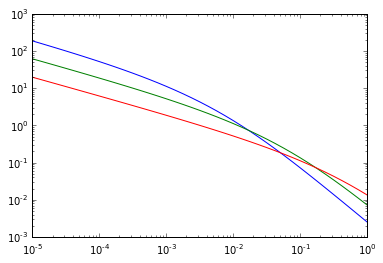

In [91]:
t = np.logspace(-5, 0., 41)
plt.loglog(t, dsig(0.1, 0.01, t))
plt.loglog(t, dsig(0.1, 0.1, t))
plt.loglog(t, dsig(0.1, 1, t))

In [92]:
# def petaconvfun(a, b, we, time, P):
def petaconvfun(m, time=t):
    a, b = m[0], m[1]    
    kernel = lambda t: a*(1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t)))
    temp = kernel(time)
#     temp = Convolution.CausalConvIntSingle(we, time, kernel)
#     out = P*temp
    out = temp.copy()
    return out

# def petaJconvfun(a, b, we, time, P):
def petaJconvfun(m, time=t):    
    a, b = m[0], m[1]
    kernela = lambda x: 1./np.sqrt(np.pi*t) - b*np.exp(b**2*t)*erfc(b*np.sqrt(t))
    kernelb = lambda x: a*(2*b*np.sqrt(t)/np.sqrt(np.pi) \
                        - 2*b**2*t*np.exp(b**2*t)*erfc(b*np.sqrt(t))\
                        - np.exp(b**2*t)*erfc(b*np.sqrt(t)))
    tempa = kernela(time)
    tempb = kernelb(time)
#     tempa = Convolution.CausalConvIntSingle(we, time, kernela)
#     tempb = Convolution.CausalConvIntSingle(we, time, kernelb)
#     J = np.c_[P*tempeta, P*temptau]
    J = np.c_[tempa, tempb]
    return J

In [93]:
from SimPEG import Tests

In [94]:
eta, tau = 0.1, 0.1
b = 1./(1.-eta)/np.sqrt(tau)
a = eta*b

m0 = np.r_[a, b]
J = petaJconvfun(m0)
dobs = petaconvfun(m0)

In [95]:
def Jvec(m, mx):
    J = petaJconvfun(m)
    return np.dot(J, mx)

In [96]:
derChk = lambda m: [petaconvfun(m), lambda mx: Jvec(m0, mx)]
passed = Tests.checkDerivative(derChk, m0, plotIt=False)

==================== checkDerivative ====================
iter    h         |ft-f0|   |ft-f0-h*J0*dx|  Order
---------------------------------------------------------
 0   1.00e-01    5.095e+01     3.693e-03      nan
 1   1.00e-02    5.096e+00     3.693e-05      2.000
 2   1.00e-03    5.096e-01     3.693e-07      2.000
 3   1.00e-04    5.096e-02     3.693e-09      2.000
 4   1.00e-05    5.096e-03     3.693e-11      2.000
 5   1.00e-06    5.096e-04     3.743e-13      1.994
 6   1.00e-07    5.096e-05     1.691e-14      1.345
========================= PASS! =========================
Awesome, Sgkang, just awesome.

